# Esteban Ocon

<img src="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/image.img.1920.medium.jpg/1641815774959.jpg" width="300">

### Team: Alpine

<img src ="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/helmet.img.png/1617101189029.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

oco_laps <- lap_data %>%
            filter(driverId == 839)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
971,57
1045,57
990,56
1052,55


`geom_smooth()` using formula 'y ~ x'



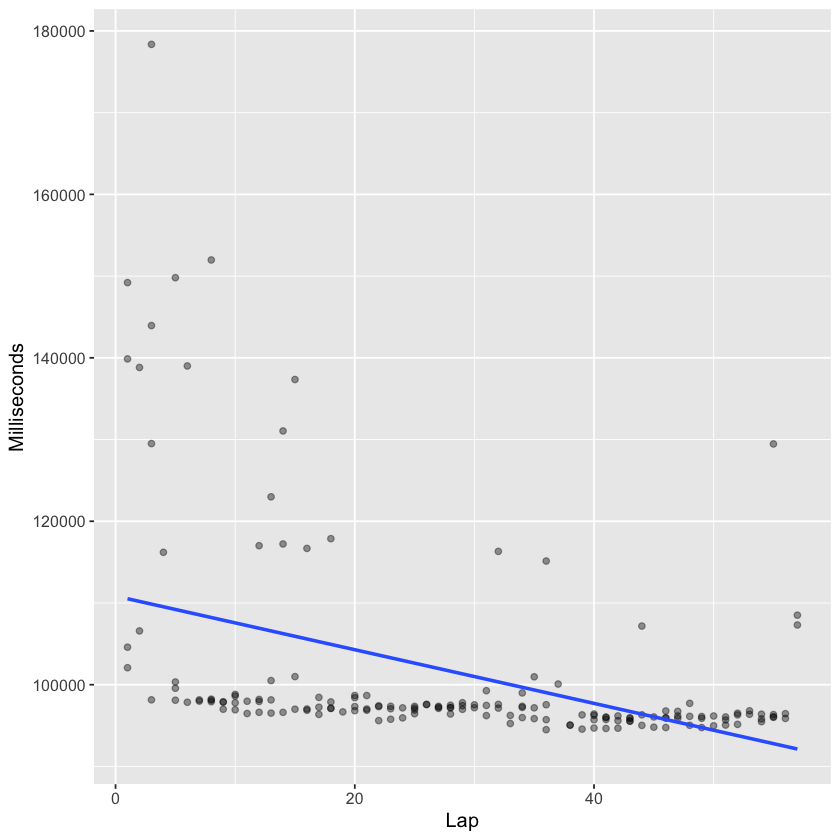

In [5]:
set.seed(2022)

#1. Bahrain

eo_bahrain <- oco_laps %>%
                filter(raceId %in% bahrain_race_ID) 

eo_bahrain_clean <- eo_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
eo_bahrain_clean
eo_bahrain_clean_ID <- eo_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_bahrain_races <- oco_laps %>%
                    filter(raceId %in% eo_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



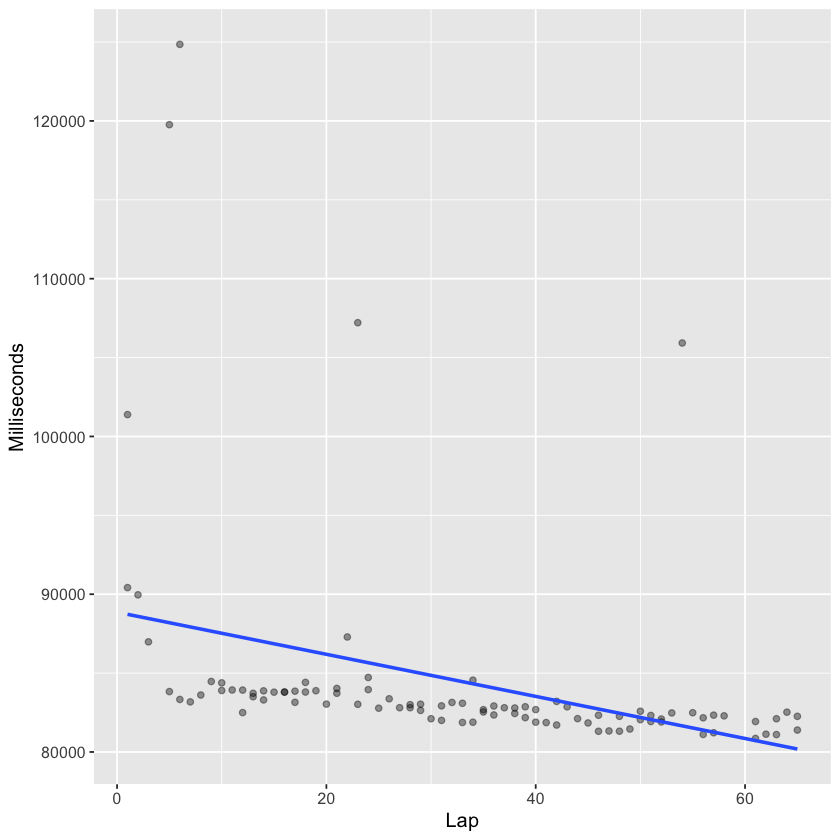

In [6]:
set.seed(2022)

#2. Portimão

eo_Portimão <- oco_laps %>%
                filter(raceId %in% Portimão_race_ID) 

eo_Portimão_eoean <- eo_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_Portimão_eoean
eo_Portimão_eoean_ID <- eo_Portimão_eoean %>%
                        pull(raceId)


### SPLITTING DATA

eo_Portimão_races <- oco_laps %>%
                    filter(raceId %in% eo_Portimão_eoean_ID)

formulaone_split <- initial_split(eo_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
989,58
969,56


`geom_smooth()` using formula 'y ~ x'



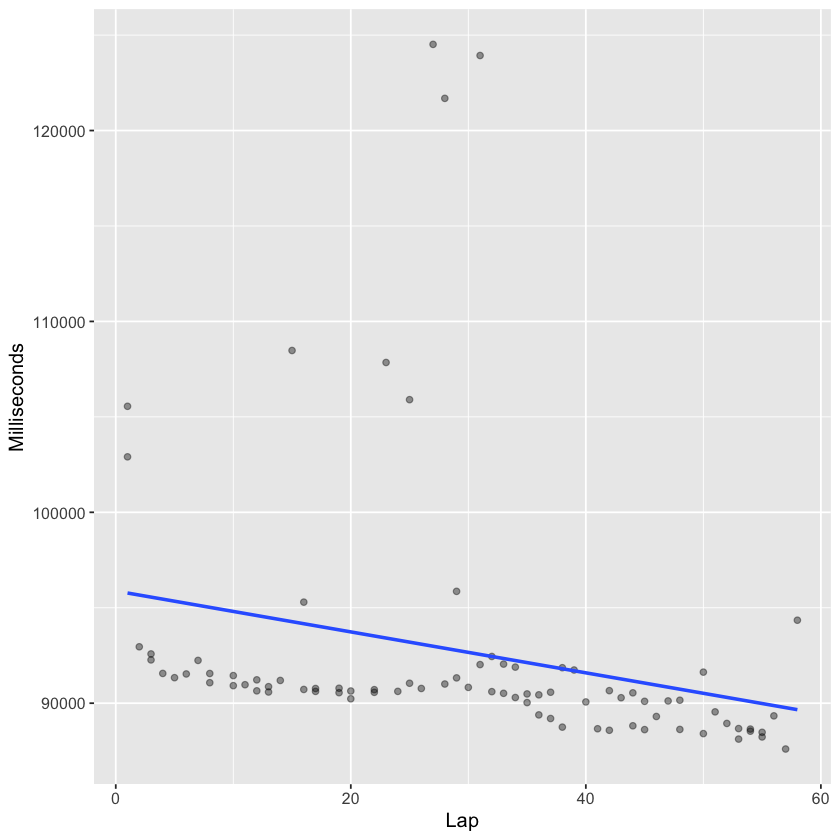

In [7]:
set.seed(2022)

#3. Australia

eo_aus <- oco_laps %>%
                filter(raceId %in% aus_race_ID) 

eo_aus_clean <- eo_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_aus_clean
eo_aus_clean_ID <- eo_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_aus_races <- oco_laps %>%
                    filter(raceId %in% eo_aus_clean_ID)

formulaone_split <- initial_split(eo_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1053,63
1043,27


`geom_smooth()` using formula 'y ~ x'



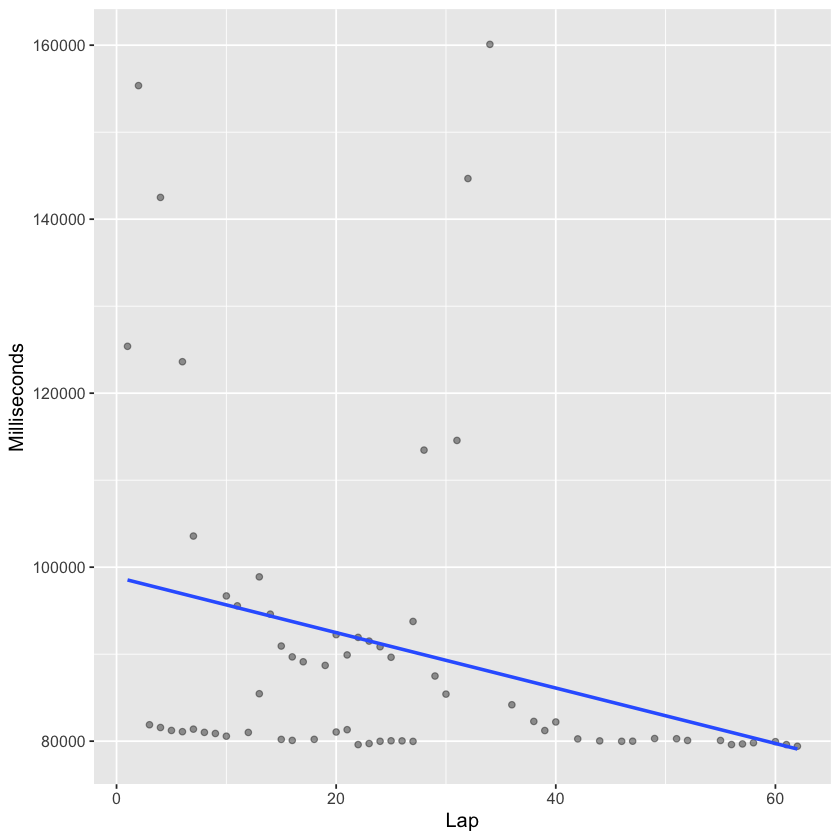

In [8]:
set.seed(2022)

#4. Italy, Imola

eo_imola <- oco_laps %>%
                filter(raceId %in% imola_race_ID) 

eo_imola_clean <- eo_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_imola_clean
eo_imola_clean_ID <- eo_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_imola_races <- oco_laps %>%
                    filter(raceId %in% eo_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,57
1067,57


`geom_smooth()` using formula 'y ~ x'



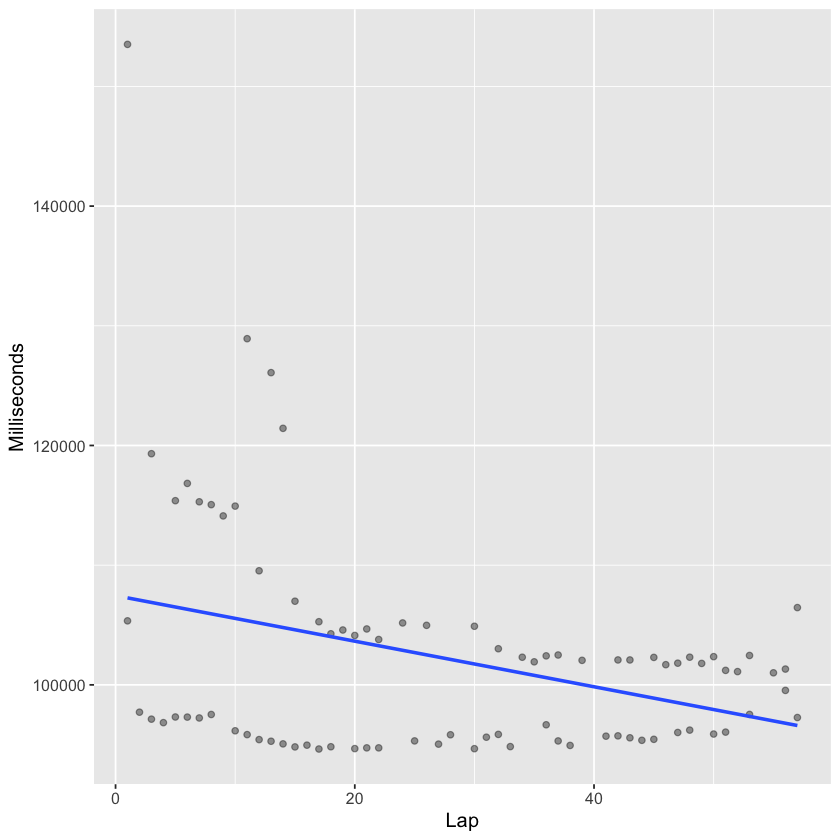

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

eo_turkey <- oco_laps %>%
                filter(raceId %in% turkey_race_ID) 

eo_turkey_clean <- eo_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_turkey_clean
eo_turkey_clean_ID <- eo_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_turkey_races <- oco_laps %>%
                    filter(raceId %in% eo_turkey_clean_ID) 

formulaone_split <- initial_split(eo_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
973,65
1036,65
1055,65
993,38


`geom_smooth()` using formula 'y ~ x'



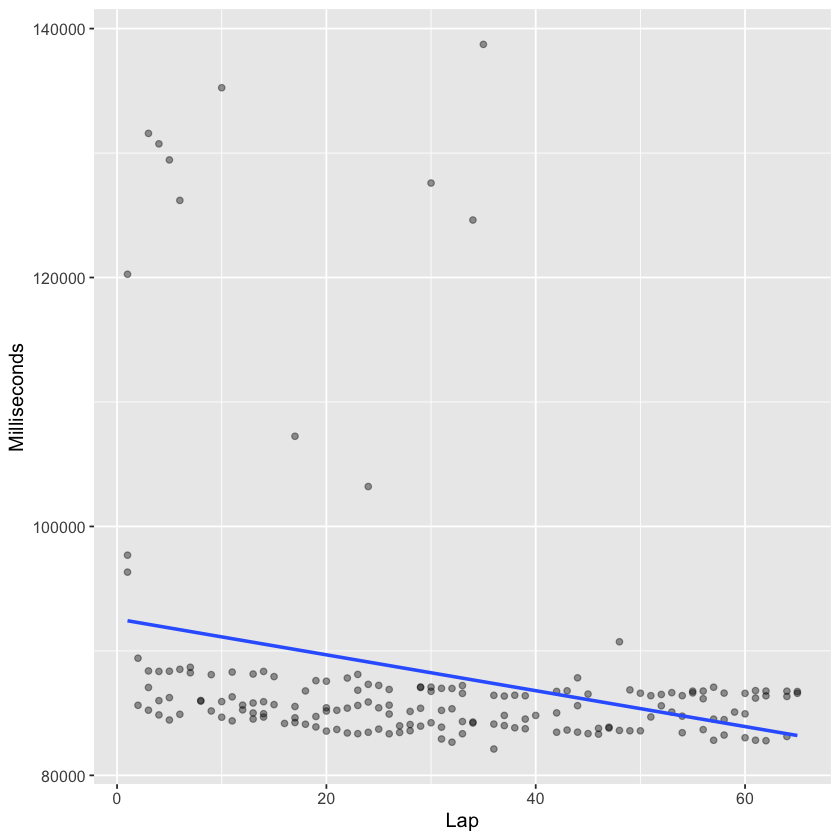

In [10]:
set.seed(2022)

#6. Spain

eo_spain <- oco_laps %>%
                filter(raceId %in% spain_race_ID) 

eo_spain_clean <- eo_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_spain_clean
eo_spain_clean_ID <- eo_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_spain_races <- oco_laps %>%
                    filter(raceId %in% eo_spain_clean_ID)

formulaone_split <- initial_split(eo_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
974,78
994,78
1056,77


`geom_smooth()` using formula 'y ~ x'



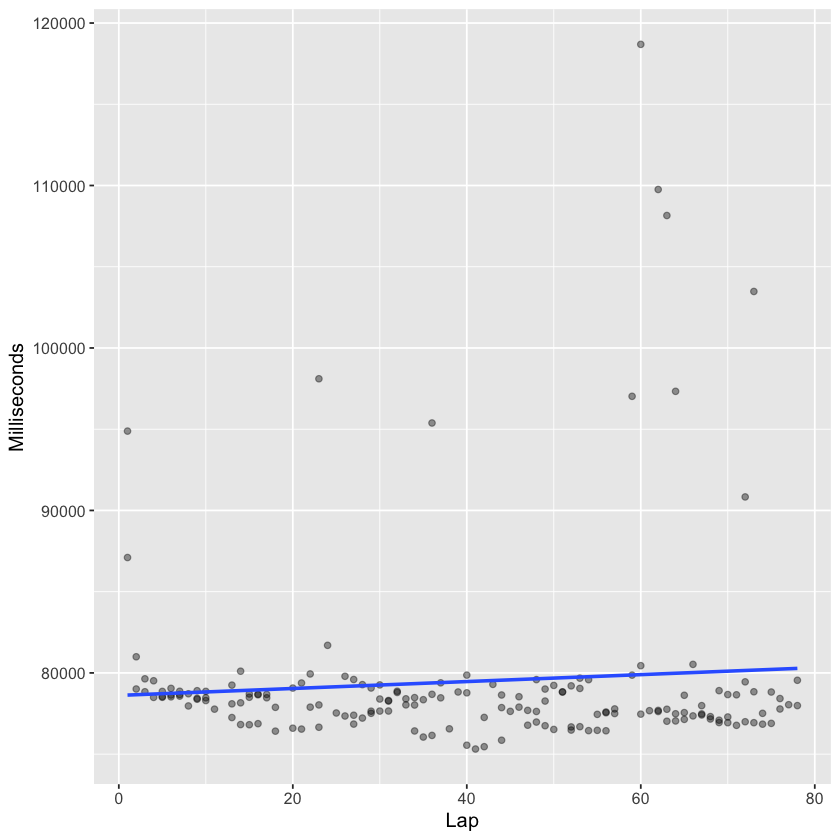

In [11]:
set.seed(2022)

#7. Monaco

eo_monaco <- oco_laps %>%
                filter(raceId %in% monaco_race_ID) 

eo_monaco_clean <- eo_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_monaco_clean
eo_monaco_clean_ID <- eo_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monaco_races <- oco_laps %>%
                    filter(raceId %in% eo_monaco_clean_ID)

formulaone_split <- initial_split(eo_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
976,51
1057,3


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



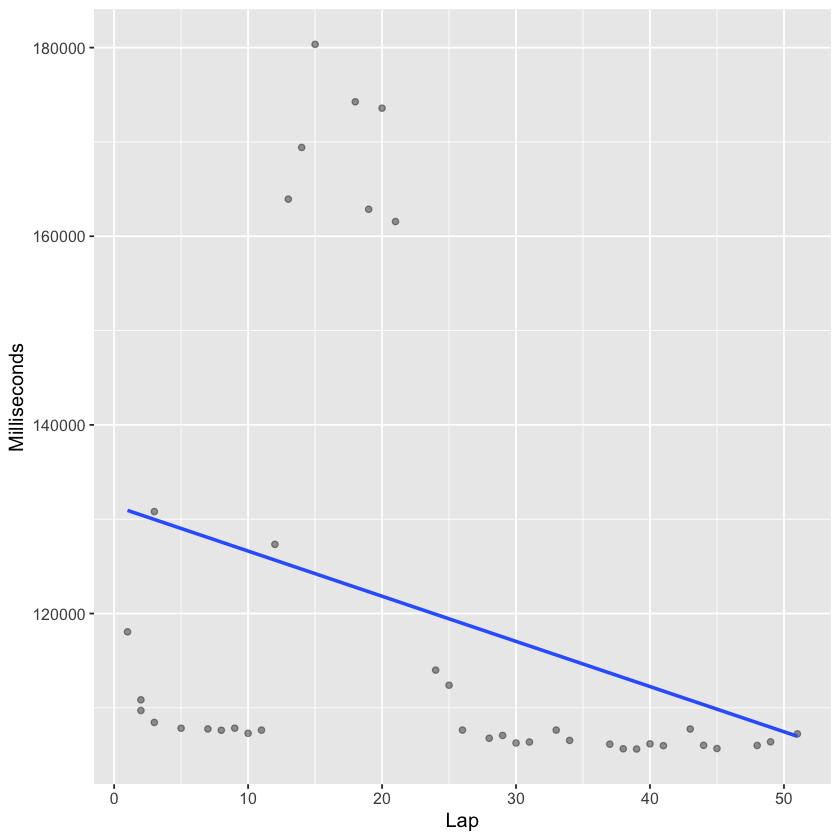

In [12]:
set.seed(2022)

#8. Azerbaijan

eo_azerbaijan <- oco_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

eo_azerbaijan_clean <- eo_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_azerbaijan_clean
eo_azerbaijan_clean_ID <- eo_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_azerbaijan_races <- oco_laps %>%
                    filter(raceId %in% eo_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
975,70
995,67


`geom_smooth()` using formula 'y ~ x'



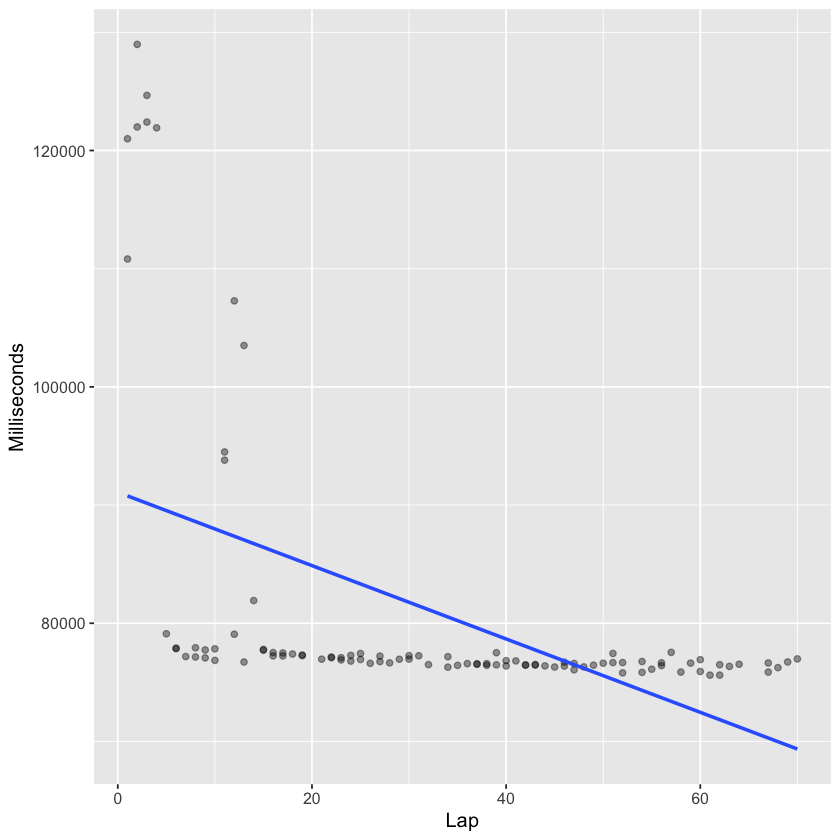

In [13]:
set.seed(2022)

#9. Canada

eo_canada <- oco_laps %>%
                filter(raceId %in% canada_race_ID) 

eo_canada_clean <- eo_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_canada_clean
eo_canada_clean_ID <- eo_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_canada_races <- oco_laps %>%
                    filter(raceId %in% eo_canada_clean_ID)

formulaone_split <- initial_split(eo_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



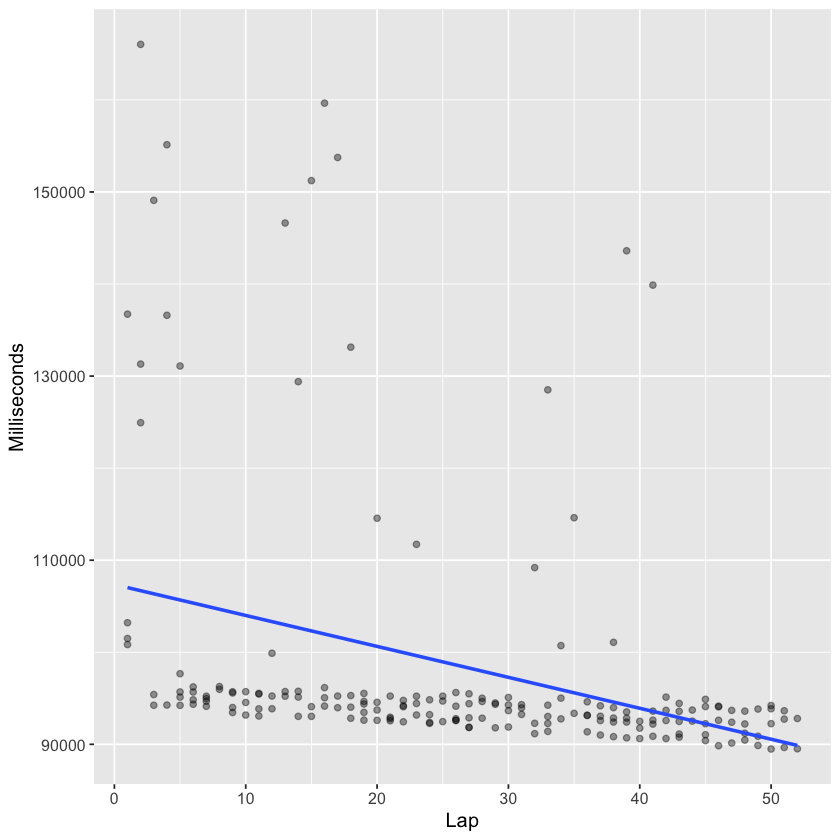

In [14]:
set.seed(2022)

#10. Great Britain

eo_uk <- oco_laps %>%
                filter(raceId %in% uk_race_ID) 

eo_uk_clean <- eo_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_uk_clean_ID <- eo_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uk_races <- oco_laps %>%
                    filter(raceId %in% eo_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



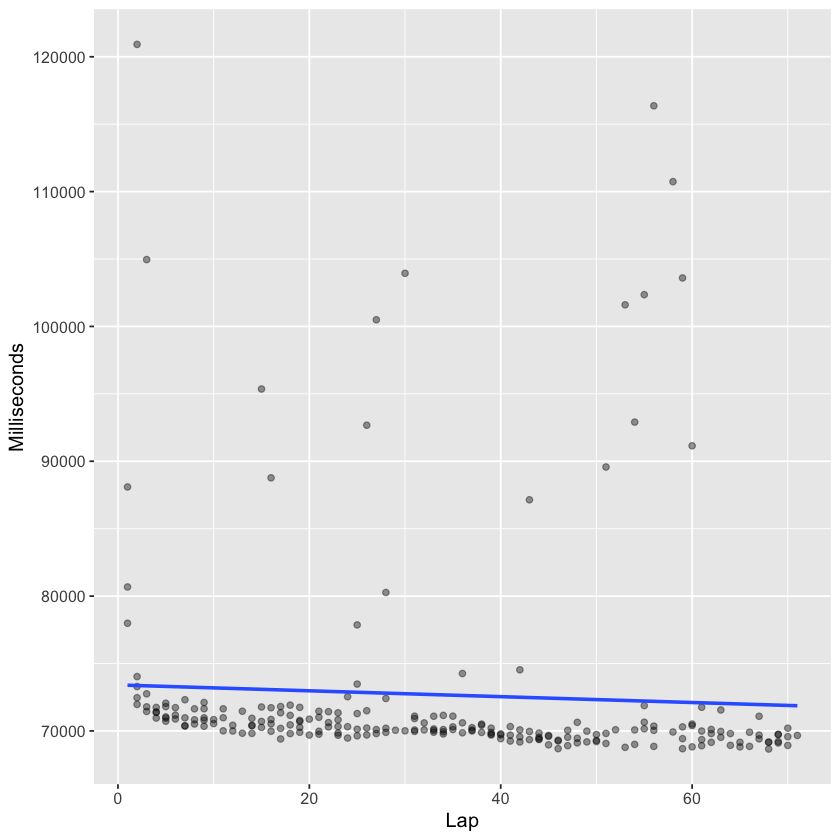

In [15]:
set.seed(2022)

#11. Austria

eo_austria <- oco_laps %>%
                filter(raceId %in% austria_race_ID) 

eo_austria_clean <- eo_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austria_clean_ID <- eo_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austria_races <- oco_laps %>%
                    filter(raceId %in% eo_austria_clean_ID)

formulaone_split <- initial_split(eo_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



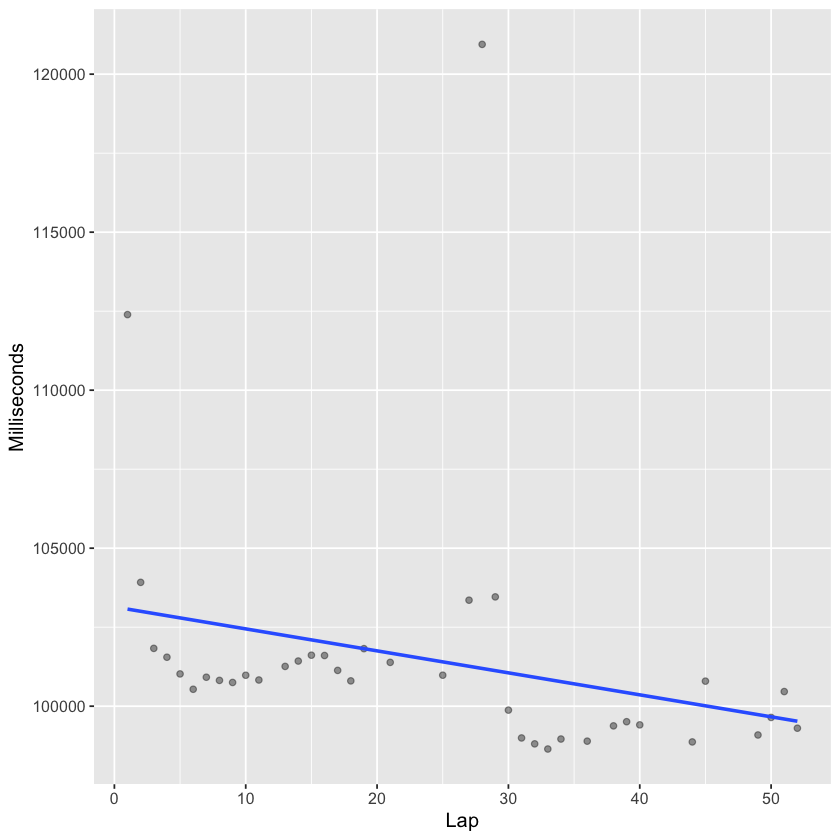

In [16]:
set.seed(2022)

#12. France

eo_france <- oco_laps %>%
                filter(raceId %in% france_race_ID) 

eo_france_clean <- eo_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_france_clean
eo_france_clean_ID <- eo_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_france_races <- oco_laps %>%
                    filter(raceId %in% eo_france_clean_ID) 

formulaone_split <- initial_split(eo_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



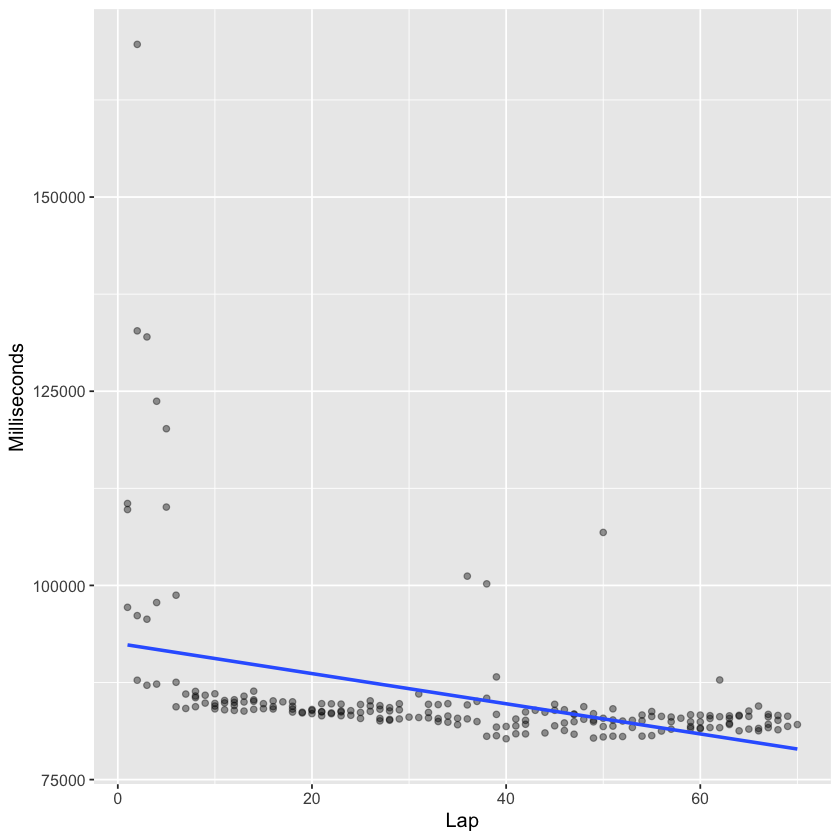

In [17]:
set.seed(2022)

#13. Hungary

eo_hungary <- oco_laps %>%
                filter(raceId %in% hungary_race_ID) 

eo_hungary_clean <- eo_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

eo_hungary_clean_ID <- eo_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_hungary_races <- oco_laps %>%
                    filter(raceId %in% eo_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
980,44
1001,44
1037,44
960,43
1063,1


`geom_smooth()` using formula 'y ~ x'



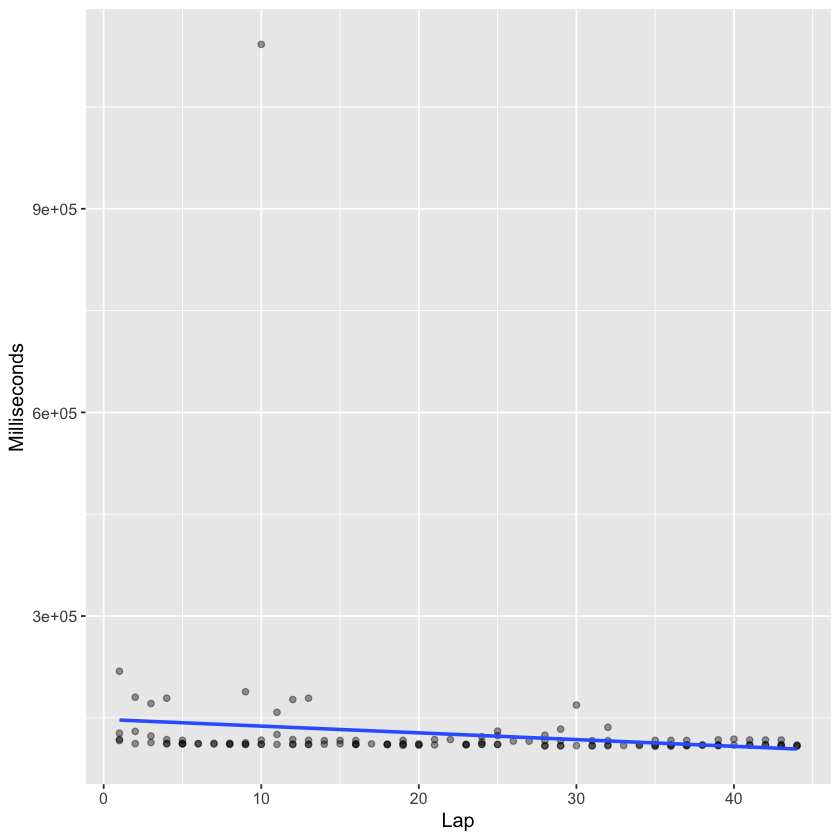

In [18]:
set.seed(2022)

#14. Belgium

eo_belgium <- oco_laps %>%
                filter(raceId %in% belgium_race_ID) 

eo_belgium_clean <- eo_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_belgium_clean
eo_belgium_clean_ID <- eo_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_belgium_races <- oco_laps %>%
                    filter(raceId %in% eo_belgium_clean_ID)

formulaone_split <- initial_split(eo_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



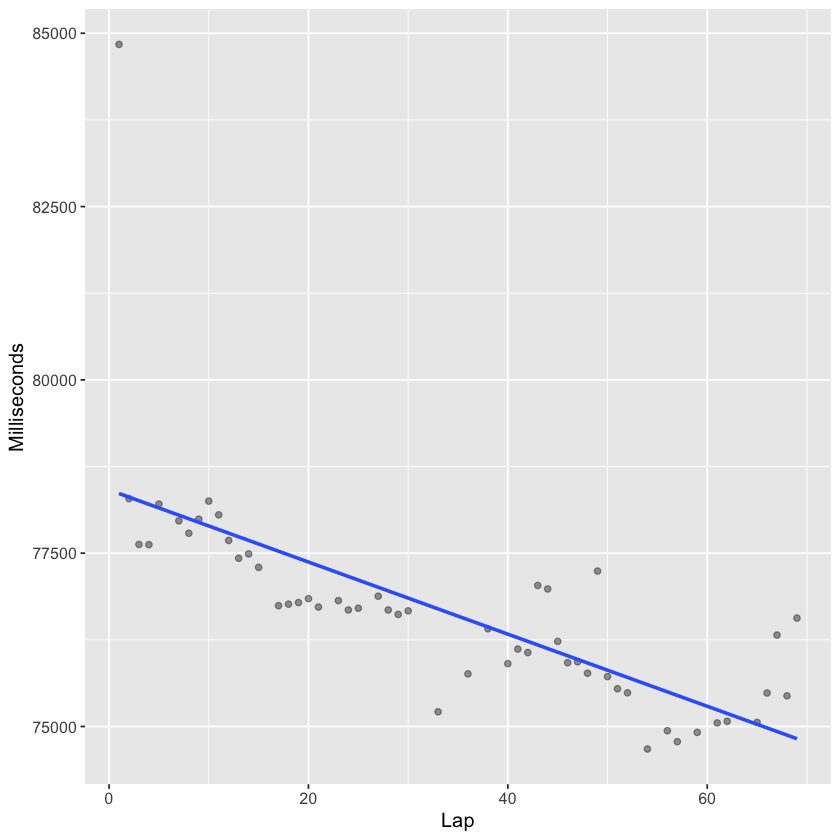

In [19]:
set.seed(2022)

#15. Netherlands

eo_netherlands <- oco_laps %>%
                filter(raceId %in% netherlands_race_ID) 

eo_netherlands_clean <- eo_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_netherlands_clean_ID <- eo_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_netherlands_races <- oco_laps %>%
                    filter(raceId %in% eo_netherlands_clean_ID)

formulaone_split <- initial_split(eo_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`geom_smooth()` using formula 'y ~ x'



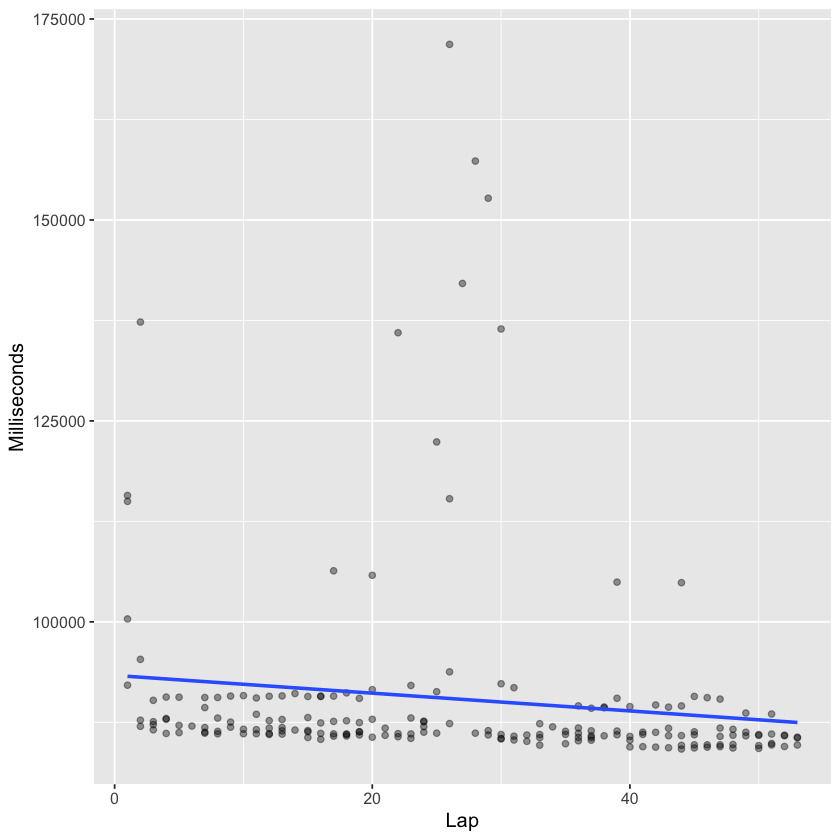

In [20]:
set.seed(2022)

#16. Italy, Monza

eo_monza <- oco_laps %>%
                filter(raceId %in% monza_race_ID) 

eo_monza_clean <- eo_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

eo_monza_clean_ID <- eo_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monza_races <- oco_laps %>%
                    filter(raceId %in% eo_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



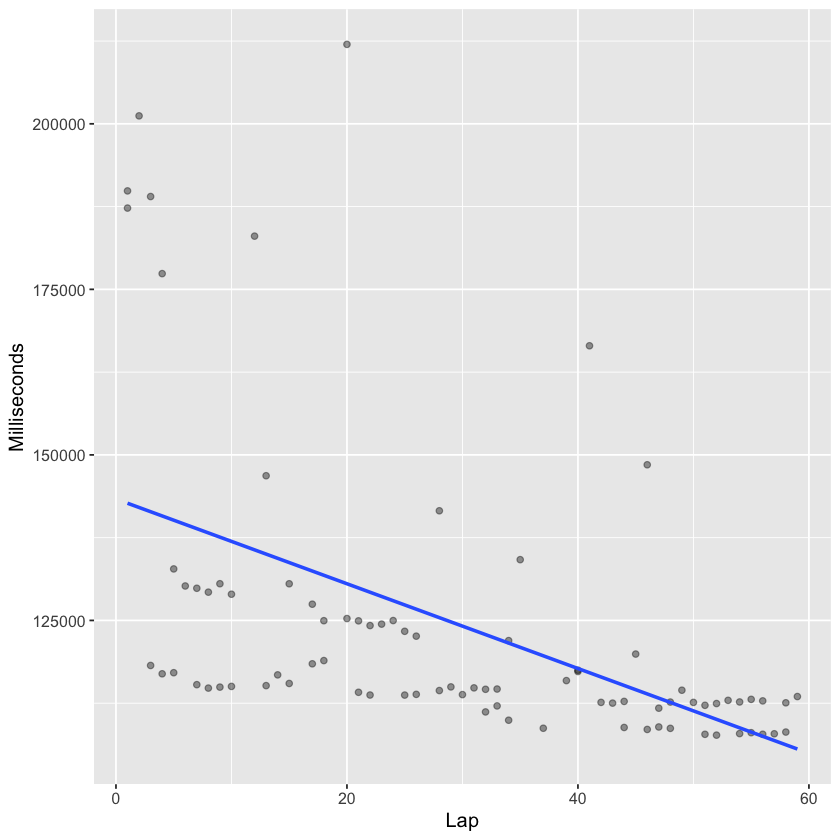

In [21]:
set.seed(2022)

#17. Singapore

eo_singapore <- oco_laps %>%
                filter(raceId %in% singapore_race_ID) 

eo_singapore_clean <- eo_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_singapore_clean_ID <- eo_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_singapore_races <- oco_laps %>%
                    filter(raceId %in% eo_singapore_clean_ID)

formulaone_split <- initial_split(eo_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



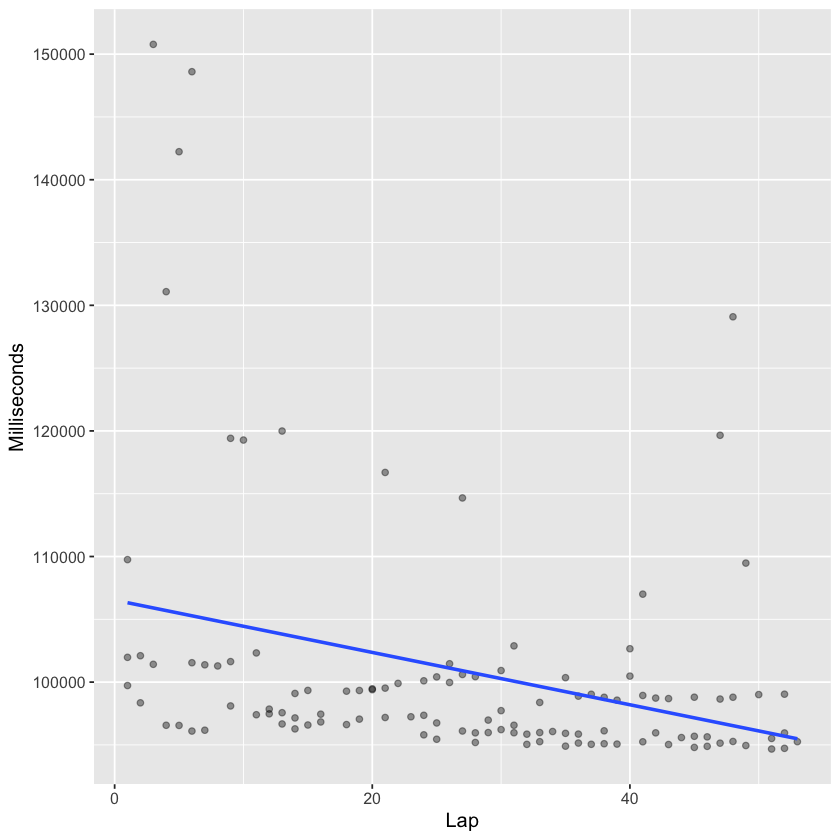

In [22]:
set.seed(2022)

#18. Japan

eo_japan <- oco_laps %>%
                filter(raceId %in% japan_race_ID) 

eo_japan_clean <- eo_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_japan_clean_ID <- eo_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_japan_races <- oco_laps %>%
                    filter(raceId %in% eo_japan_clean_ID)

formulaone_split <- initial_split(eo_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



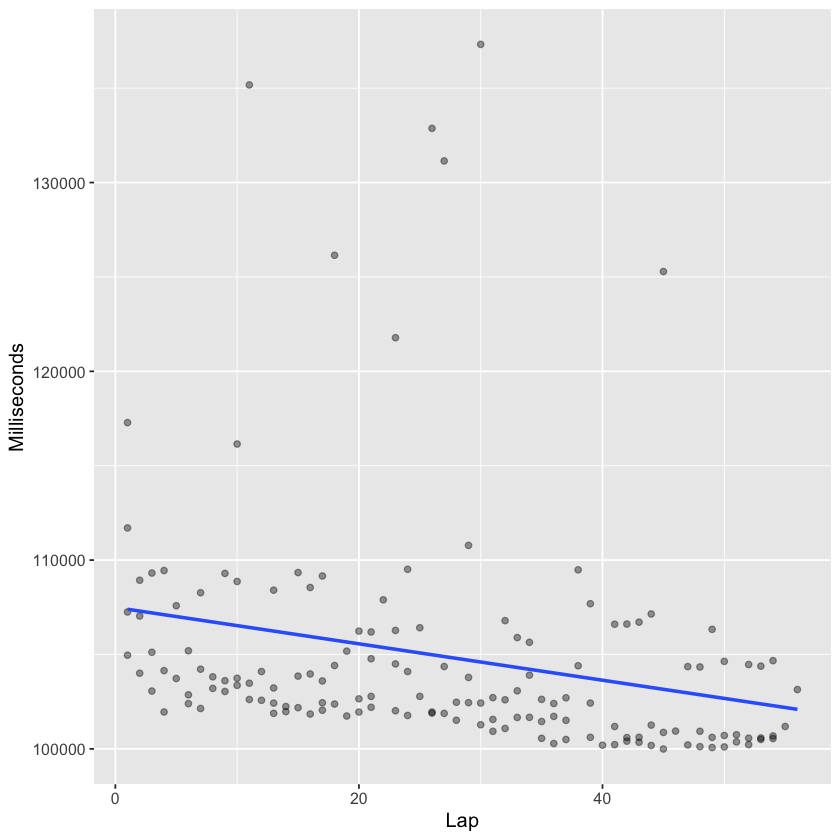

In [23]:
set.seed(2022)

#19. USA, Austin

eo_austin <- oco_laps %>%
                filter(raceId %in% austin_race_ID) 

eo_austin_clean <- eo_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austin_clean_ID <- eo_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austin_races <- oco_laps %>%
                    filter(raceId %in% eo_austin_clean_ID)

formulaone_split <- initial_split(eo_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



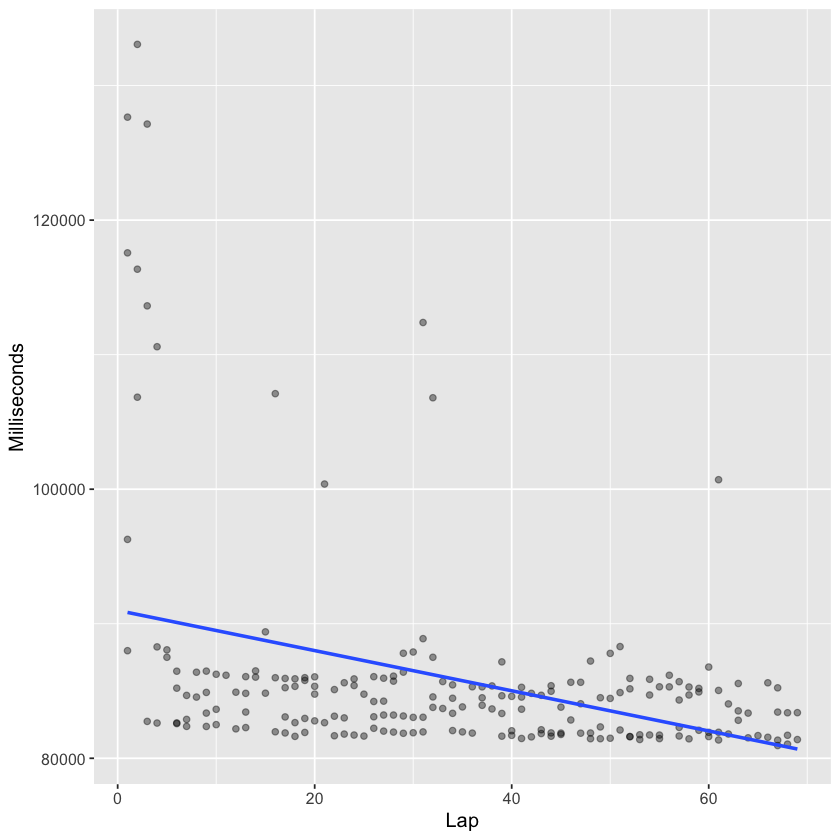

In [24]:
set.seed(2022)

#20. Mexico

eo_mexico <- oco_laps %>%
                filter(raceId %in% mexico_race_ID) 

eo_mexico_clean <- eo_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_mexico_clean_ID <- eo_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_mexico_races <- oco_laps %>%
                    filter(raceId %in% eo_mexico_clean_ID)

formulaone_split <- initial_split(eo_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



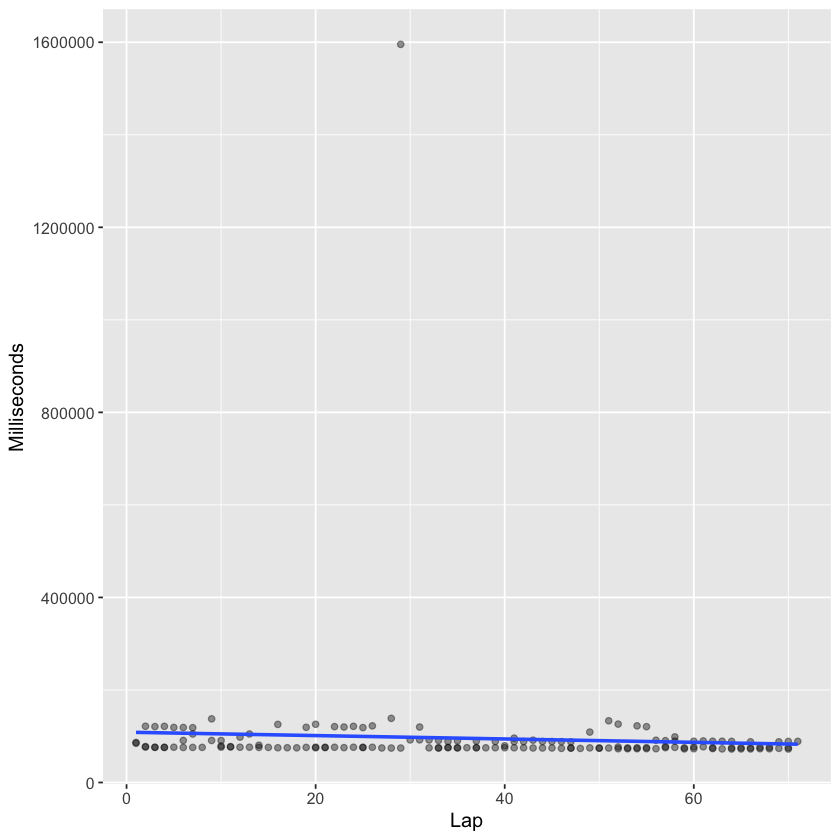

In [25]:
set.seed(2022)

#21. Brazil

eo_brazil <- oco_laps %>%
                filter(raceId %in% brazil_race_ID) 

eo_brazil_clean <- eo_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_brazil_clean_ID <- eo_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_brazil_races <- oco_laps %>%
                    filter(raceId %in% eo_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
988,55
1047,55
968,54
1009,44


`geom_smooth()` using formula 'y ~ x'



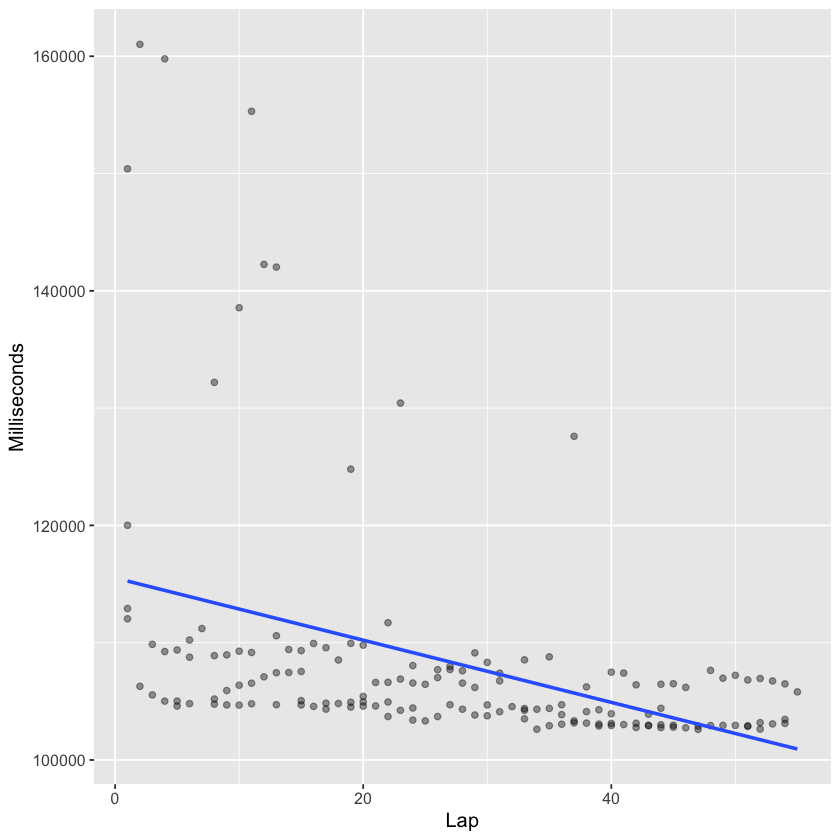

In [26]:
set.seed(2022)

#22. Abu Dhabi

eo_uae <- oco_laps %>%
                filter(raceId %in% uae_race_ID) 

eo_uae_clean <- eo_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_uae_clean
eo_uae_clean_ID <- eo_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uae_races <- oco_laps %>%
                    filter(raceId %in% eo_uae_clean_ID)

formulaone_split <- initial_split(eo_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

eo_merge <- merge(rmse_col, racetime_col)

eo_merge

write_csv(eo_merge, "final_race_data/eo_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,10303.473,1
rmse,standard,12726.965,2
rmse,standard,7098.466,3
rmse,standard,14213.632,4
rmse,standard,7320.337,5
rmse,standard,9842.432,6
rmse,standard,3897.310,7
rmse,standard,25644.054,8
rmse,standard,5948.849,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5775611,96.26019,1.604336,1
5569771,92.82952,1.547159,2
5377574,89.62623,1.493771,3
5585280,93.08801,1.551467,4
5810335,96.83892,1.613982,5
5790830,96.51384,1.608564,6
6197643,103.29405,1.721568,7
6066947,101.11579,1.685263,8
5604687,93.41145,1.556858,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,10303.473,5775611,96.26019,1.604336
2,rmse,standard,12726.965,5569771,92.82952,1.547159
3,rmse,standard,7098.466,5377574,89.62623,1.493771
4,rmse,standard,14213.632,5585280,93.08801,1.551467
5,rmse,standard,7320.337,5810335,96.83892,1.613982
6,rmse,standard,9842.432,5790830,96.51384,1.608564
7,rmse,standard,3897.310,6197643,103.29405,1.721568
8,rmse,standard,25644.054,6066947,101.11579,1.685263
9,rmse,standard,5948.849,5604687,93.41145,1.556858
